# Beslutsträd
- https://scikit-learn.org/stable/modules/tree.html
- https://en.wikipedia.org/wiki/ID3_algorithm

- Den första som fungerade väl var ID3, idag används 4.5
- Det är en rekursiv algoritm
- Finns olika entropier. Mått på slump. 1=nat (natural), 2=shannon, 10=Hartley. Finns måååånga mer
- Du har ett gränsvärde och kollar om det går under eller över. Upprepa sedan steget så skapas det som ett träd av valda och bortvalda värden.
- Heuristisk. Det går inte att garantera att modellen hittar den mest optimala lösningen.
- Väldigt tydligt statistik!
- Beslutsträd har många problem, men för vissa grejer är det optimalt. De är mycket snabba.
- Stora träd har ofta fel, så om inte algoritmen har hittat "rätt"  innan några steg så bör den avbrytas.
- när man avbryter på detta sätt kallas det för en "stump".
- Många träd ihop blir en skog. skräll.
- Decision Forrest

- Bagging: generera pseudo träningsdata (hur många som helst på hur få datapunkter som helst), bygg ett pseudoträd på varje grupp, rösta fram bästa
- Boosting: bygg många små träd från residular från tidigare träd. Tre hyperparametrar:
    - n-splits, hur många val
    - shrinkage ($\lambda$), hur små ska residualträden vara
    - n-trees, hur många träd som ska byggas
- **Random forest**: istället för att välja parametern som splittar datan bäst till "löv", så väljer vi istället slumpmässigt. Detta är den bästa?
    - Välj m stycken features från alla möjliga
    - n_estimators: hur många träd i skogen
    - bootstrap: missade detta... något om att tillverka delmängder
    - oob: out-of-bag, tar med det som inte kom med i bootstrapningen.

### Naive Bayes

- Man förutsätter att inga korrelationer finns. Naivt.
- Man antar då även en distrubition. Det kan va normalfördelning, multinomiell, komplement, bernoulli, kategorisk mm
- NB är otroligt billig att köra, men inte så trovärdig.
    - En "bra" NB har en accuracy på 60%
- Särskilt bra på textfilter, som typ spamfilter osv

In [1]:
import ISLP
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

data = ISLP.load_data('Smarket')

X, y = data.drop(['Direction', 'Today'], axis=1), data['Direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

              precision    recall  f1-score   support

        Down       0.51      0.35      0.42       306
          Up       0.52      0.68      0.59       319

    accuracy                           0.52       625
   macro avg       0.52      0.52      0.50       625
weighted avg       0.52      0.52      0.51       625



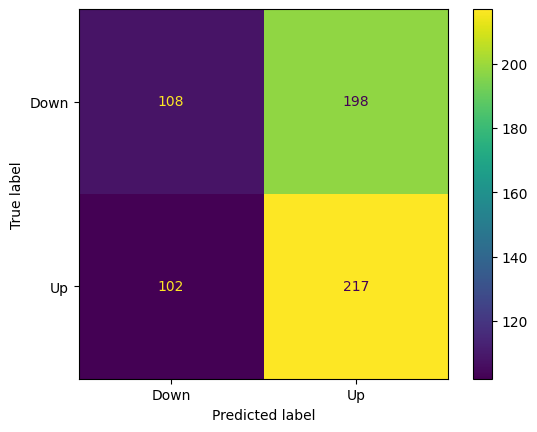

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()

              precision    recall  f1-score   support

        Down       0.52      0.53      0.52       306
          Up       0.54      0.52      0.53       319

    accuracy                           0.53       625
   macro avg       0.53      0.53      0.53       625
weighted avg       0.53      0.53      0.53       625



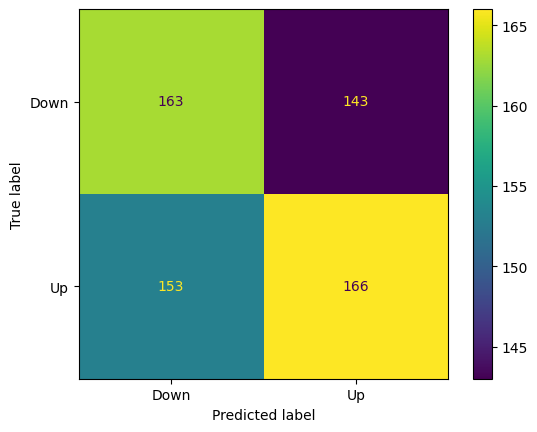

In [3]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = ComplementNB()
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()

              precision    recall  f1-score   support

        Down       0.00      0.00      0.00       306
          Up       0.51      1.00      0.68       319

    accuracy                           0.51       625
   macro avg       0.26      0.50      0.34       625
weighted avg       0.26      0.51      0.34       625



c:\Users\isaka\.virtualenvs\MachineLearning-Isak-Andersson-0nAm_eHr\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isaka\.virtualenvs\MachineLearning-Isak-Andersson-0nAm_eHr\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isaka\.virtualenvs\MachineLearning-Isak-Andersson-0nAm_eHr\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

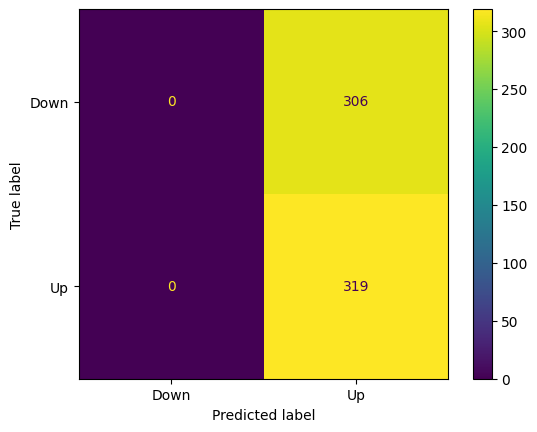

In [4]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()

              precision    recall  f1-score   support

        Down       0.51      0.26      0.34       306
          Up       0.52      0.76      0.62       319

    accuracy                           0.52       625
   macro avg       0.51      0.51      0.48       625
weighted avg       0.51      0.52      0.48       625



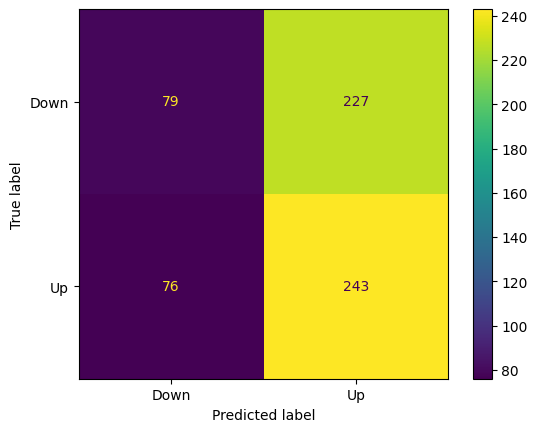

In [5]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB() # Antagligen har vi hittat precis hur datasettet skapats från första början, alltså inte lyckats förutspå marknaden till 100%...
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()